In [14]:
import os
import pandas as pd
import numpy as np
os.getcwd()


'C:\\Users\\Amandeep\\Desktop\\ResearchProject\\data-driven-svd-regression\\exploratory_analysis'

In [22]:
adm = pd.read_csv("../analysis_data/target-hospital-admissions.csv")
loc = pd.read_csv("../data/from_state_to_fip_and_pop.csv")

print(adm.shape)
print(adm.head())

print(loc.shape)
print(loc.head())

(17577, 5)
         date location location_name  value  weekly_rate
0  2024-10-05       02        Alaska    1.0     0.135111
1  2024-10-12       02        Alaska    1.0     0.135111
2  2024-10-19       02        Alaska    1.0     0.135111
3  2024-10-26       02        Alaska    3.0     0.405333
4  2024-11-02       02        Alaska    8.0     1.080887
(53, 12)
  abbreviation location location_name  population  count_rate0p3  \
0           US       US            US   334914895           1005   
1           AL       01       Alabama     5108468             15   
2           AK       02        Alaska      733406              2   
3           AZ       04       Arizona     7431344             22   
4           AR       05      Arkansas     3067732              9   

   count_rate0p5  count_rate0p7  count_rate1  count_rate1p7  count_rate3  \
0           1675           2344         3349           5694        10047   
1             26             36           51             87          153   
2

In [18]:
#Checking datatype
print(adm.dtypes)
print(loc.dtypes)

date              object
location          object
location_name     object
value            float64
weekly_rate      float64
dtype: object
abbreviation     object
location         object
location_name    object
population        int64
count_rate0p3     int64
count_rate0p5     int64
count_rate0p7     int64
count_rate1       int64
count_rate1p7     int64
count_rate3       int64
count_rate4       int64
count_rate5       int64
dtype: object


In [19]:
#Basic Statistics
print(adm.describe())
print(loc.describe())

              value   weekly_rate
count  17019.000000  14279.000000
mean     205.860333      1.293080
std     1311.236303      2.980340
min        0.000000      0.000000
25%        3.000000      0.065938
50%       16.000000      0.251077
75%       78.000000      0.897234
max    55483.000000     38.991101
         population  count_rate0p3  count_rate0p5  count_rate0p7  count_rate1  \
count  5.300000e+01      53.000000      53.000000      53.000000    53.000000   
mean   1.269878e+07      38.132075      63.547170      88.886792   126.943396   
std    4.570263e+07     137.150120     228.570942     319.872130   457.018238   
min    5.840570e+05       2.000000       3.000000       4.000000     6.000000   
25%    1.964726e+06       6.000000      10.000000      14.000000    20.000000   
50%    4.526154e+06      14.000000      23.000000      32.000000    45.000000   
75%    7.812880e+06      23.000000      39.000000      55.000000    78.000000   
max    3.349149e+08    1005.000000    1675.000

In [26]:
#Checking missing values
print(adm.isna().sum())
print(loc.isna().sum())

#Checking Percentage of missing value
print(adm.isnull().sum() / len(adm) * 100)
print(loc.isnull().sum() / len(loc) * 100)

date                0
location         2790
location_name    2790
value             558
weekly_rate      3298
dtype: int64
abbreviation     0
location         0
location_name    0
population       0
count_rate0p3    0
count_rate0p5    0
count_rate0p7    0
count_rate1      0
count_rate1p7    0
count_rate3      0
count_rate4      0
count_rate5      0
dtype: int64
date              0.000000
location         15.873016
location_name    15.873016
value             3.174603
weekly_rate      18.763156
dtype: float64
abbreviation     0.0
location         0.0
location_name    0.0
population       0.0
count_rate0p3    0.0
count_rate0p5    0.0
count_rate0p7    0.0
count_rate1      0.0
count_rate1p7    0.0
count_rate3      0.0
count_rate4      0.0
count_rate5      0.0
dtype: float64


# Analyzing the formatted_flu.csv file

In [35]:
form = pd.read_csv("../analysis_data/formatted_flu.csv")
print(form["season"].head())
print(form["season"].unique()[:5])
print(form["season_week"].min(), form["season_week"].max())
print(form["population"].isna().sum())


0    2020/2021
1    2020/2021
2    2020/2021
3    2020/2021
4    2020/2021
Name: season, dtype: object
['2020/2021' '2021/2022' '2022/2023' '2023/2024' '2024/2025']
0 32
0


# Analyzing the hosps_pop_norm.csv file
Load the normalized hospitalization data and examine its structure.

         date location location_name  population  value     season  \
0  2020-10-24       01       Alabama     5108468    3.0  2020/2021   
1  2020-10-31       01       Alabama     5108468   18.0  2020/2021   
2  2020-11-07       01       Alabama     5108468   21.0  2020/2021   
3  2020-11-14       01       Alabama     5108468   25.0  2020/2021   
4  2020-11-21       01       Alabama     5108468   11.0  2020/2021   

   season_week  epiyear  epiweek  weekly_rate  hosps_pop_norm  
0            3     2020       43     0.058165        0.058726  
1            4     2020       44     0.348993        0.352356  
2            5     2020       45     0.407158        0.411082  
3            6     2020       46     0.484712        0.489384  
4            7     2020       47     0.213273        0.215329  
Index(['date', 'location', 'location_name', 'population', 'value', 'season',
       'season_week', 'epiyear', 'epiweek', 'weekly_rate', 'hosps_pop_norm'],
      dtype='object')


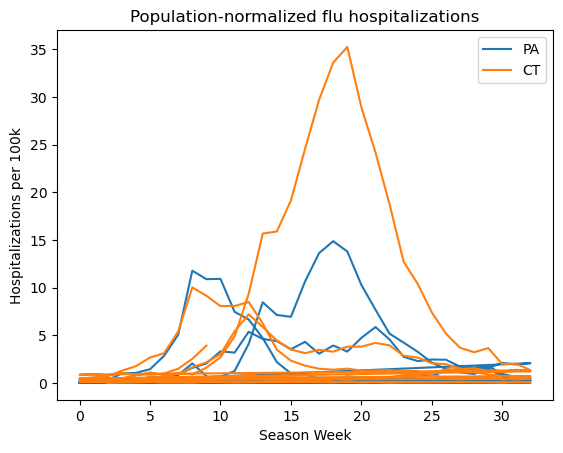

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

hosps = pd.read_csv("../analysis_data/hosps_pop_norm.csv")
print(hosps.head())
print(hosps.columns)

states = ["42", "09"]  # PA=42, CT=09

subset = hosps[hosps["location"].isin(states)]

for state, g in subset.groupby("location"):
    plt.plot(g["season_week"], g["hosps_pop_norm"], label=state)

plt.xlabel("Season Week")
plt.ylabel("Hospitalizations per 100k")
plt.title("Population-normalized flu hospitalizations")
plt.legend(["PA", "CT"])
plt.show()


# Interpretation Guide:

View 1: Shows all data points. Look for overall clustering - are states similar?  
View 2: Shows year-to-year variation. Different seasons may have different intensities.  
View 3: Best for seeing temporal trends and cyclical patterns.  
View 4: Shows the "typical" flu season shape. Shaded area = variability across years.  

In [ ]:
"""
pop_norm_check.py

Quick check: Are population-normalized hospitalizations on a comparable scale
between a large state (PA) and a smaller state (CT)?

Input:
- analysis_data/hosps_pop_norm.csv

Outputs:
- viz/pa_vs_ct_pop_norm.png
- viz/normalization_effect_multi_states.png
"""

import os
import pandas as pd
import matplotlib.pyplot as plt


DATA_PATH = os.path.join("analysis_data", "hosps_pop_norm.csv")
VIZ_DIR = "viz"


def main():
    os.makedirs(VIZ_DIR, exist_ok=True)

    df = pd.read_csv(DATA_PATH)
    df["date"] = pd.to_datetime(df["date"])

    # ---- Plot 1: PA vs CT (normalized) over season_week ----
    pa, ct = "42", "09"
    sub = df[df["location"].isin([pa, ct])].copy()

    plt.figure(figsize=(10, 5))
    for code, label in [(pa, "PA"), (ct, "CT")]:
        g = sub[sub["location"] == code]
        plt.plot(g["season_week"], g["hosps_pop_norm"], label=label)

    plt.xlabel("Season Week (0 = MMWR week 40)")
    plt.ylabel("Hospitalizations per 100k")
    plt.title("Population-normalized flu hospitalizations: PA vs CT")
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(VIZ_DIR, "pa_vs_ct_pop_norm.png"), dpi=200)
    plt.close()

    # ---- Plot 2: Before vs After (multi-state) ----
    compare = {
        "06": "CA",
        "48": "TX",
        "42": "PA",
        "09": "CT",
        "50": "VT",
        "02": "AK",
    }
    multi = df[df["location"].isin(compare.keys())].copy()

    fig, axes = plt.subplots(2, 1, figsize=(12, 7), sharex=True)

    # raw (not normalized)
    ax = axes[0]
    for code, label in compare.items():
        g = multi[multi["location"] == code]
        ax.plot(g["date"], g["value"], label=label, alpha=0.7)
    ax.set_title("BEFORE normalization (raw hospitalizations)")
    ax.set_ylabel("Raw hospitalizations")
    ax.grid(True, alpha=0.3)
    ax.legend(ncol=3, fontsize=8)

    # normalized
    ax = axes[1]
    for code, label in compare.items():
        g = multi[multi["location"] == code]
        ax.plot(g["date"], g["hosps_pop_norm"], label=label, alpha=0.7)
    ax.set_title("AFTER normalization (per 100k)")
    ax.set_ylabel("Hospitalizations per 100k")
    ax.grid(True, alpha=0.3)
    ax.legend(ncol=3, fontsize=8)

    plt.tight_layout()
    plt.savefig(os.path.join(VIZ_DIR, "normalization_effect_multi_states.png"), dpi=200)
    plt.close()


if __name__ == "__main__":
    main()
